In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
import statsmodels.formula.api as smf


data_2023 = pd.read_csv('Odata2023File.csv',sep= ";",decimal=",")

In [4]:
data_2023.columns

Index(['outid', 'Birth', 'SexTypeName', 'RegName', 'AreaName', 'TerName',
       'RegTypeName', 'TerTypeName', 'EOName', 'EOTypeName', 'EORegName',
       'EOAreaName', 'EOTerName', 'EOParent', 'Test', 'TestDate', 'UkrBlock',
       'UkrBlockStatus', 'UkrBlockBall100', 'UkrBlockBall', 'HistBlock',
       'HistBlockStatus', 'HistBlockBall100', 'HistBlockBall', 'MathBlock',
       'MathBlockStatus', 'MathBlockBall100', 'MathBlockBall', 'PhysBlock',
       'PhysBlockStatus', 'PhysBlockBall100', 'PhysBlockBall', 'ChemBlock',
       'ChemBlockStatus', 'ChemBlockBall100', 'ChemBlockBall', 'BioBlock',
       'BioBlockStatus', 'BioBlockBall100', 'BioBlockBall', 'EngBlock',
       'EngBlockStatus', 'EngBlockBall100', 'EngBlockBall', 'FraBlock',
       'FraBlockStatus', 'FraBlockBall100', 'FraBlockBall', 'DeuBlock',
       'DeuBlockStatus', 'DeuBlockBall100', 'DeuBlockBall', 'SpaBlock',
       'SpaBlockStatus', 'SpaBlockBall100', 'SpaBlockBall', 'PTRegName',
       'PTAreaName', 'PTTerName'],
  

In [5]:
new_data = data_2023[['Birth', 'SexTypeName', 'RegName', 'PTTerName', 'RegTypeName', 'TestDate', 
       'UkrBlock', 'UkrBlockStatus',  'UkrBlockBall100', 'UkrBlockBall', 'MathBlock', 'MathBlockStatus',  'MathBlockBall100', 'MathBlockBall',
       'EngBlock', 'EngBlockStatus',  'EngBlockBall100','EngBlockBall', 'HistBlock', 'HistBlockStatus', 'HistBlockBall100', 'HistBlockBall',
       'PhysBlock', 'PhysBlockStatus',  'PhysBlockBall100', 'PhysBlockBall', 'ChemBlock','ChemBlockStatus',  'ChemBlockBall100', 'ChemBlockBall',
       'BioBlock', 'BioBlockStatus',  'BioBlockBall100', 'BioBlockBall', 'FraBlock', 'FraBlockStatus',  'FraBlockBall100', 'FraBlockBall',
        'DeuBlock', 'DeuBlockStatus', 'DeuBlockBall100', 'DeuBlockBall', 'SpaBlock', 'SpaBlockStatus', 'SpaBlockBall100', 'SpaBlockBall']]      

In [6]:
new_data= new_data.rename(columns={'Birth': 'RokNarozeni', 'SexTypeName': 'Pohlavi', 'RegName': 'RegionRegistrace', 'PTTerName': 'ZkouskaVzahranici',
                                    'RegTypeName': 'StatusUcastnika', 'SexTypeName': 'Pohlavi', 'RegName': 'RegionRegistrace', 'UkrBlock': 'Ukrajinstina',
                                    'UkrBlockStatus': 'UkrVysledek', 'UkrBlockBall100': 'UkrScore', 'UkrBlockBall': 'UkrBody', 'MathBlock': 'Matematika',
                                    'MathBlockStatus': 'MathVysledek', 'MathBlockBall100': 'MathScore', 'MathBlockBall': 'MathBody', 'HistBlock': 'HistorieUKR',
                                    'HistBlockStatus': 'HistVysledek', 'HistBlockBall100': 'HistScore', 'HistBlockBall': 'HistBody', 'EngBlock': 'Anglictina',
                                    'EngBlockStatus': 'AngVysledek', 'EngBlockBall100': 'AngScore', 'EngBlockBall': 'AngBody','BioBlock': 'Biologie',
                                    'BioBlockStatus': 'BioVysledek',  'BioBlockBall100': 'BioScore', 'BioBlockBall': 'BioBody', 'PhysBlock': 'Fyzika', 
                                    'PhysBlockStatus': 'FyzVysledek', 'PhysBlockBall100': 'FyzScore', 'PhysBlockBall': 'FyzBody', 'ChemBlock': 'Chemie',
                                    'ChemBlockStatus': 'ChemVysledek', 'ChemBlockBall100': 'ChemScore', 'ChemBlockBall': 'ChemBody',  'DeuBlock': 'Nemcina', 
                                    'DeuBlockStatus': 'NemVysledek', 'DeuBlockBall100': 'NemScore', 'DeuBlockBall': 'NemBody', 'FraBlock': 'Francouzstina',
                                    'FraBlockStatus': 'FraVysledek', 'FraBlockBall100': 'FraScore', 'FraBlockBall': 'FraBody', 'SpaBlock': 'Spanelstina',
                                    'SpaBlockStatus': 'SpaVysledek', 'SpaBlockBall100': 'SpaScore', 'SpaBlockBall': 'SpaBody'                                   
                                    })

In [7]:
pohlavi_dict = {
    'чоловіча': "kluk",
      'жіноча': "holka"
      }

new_data.loc[:, 'Pohlavi'] = new_data['Pohlavi'].replace(pohlavi_dict)

In [8]:
region_registrace_dict = {
    'Запорізька область': 'Zaporizsky region',
    'Херсонська область' : 'Kchersonsky region',
    'Дніпропетровська область' : 'Dnepropetrovsky',
    'м.Київ' : 'Kyjev město',
    'Рівненська область' : 'Rivnen region',
    'Львівська область' : 'Lvivsky region',
    'Харківська область' : 'Charkovsky region',
    'Чернівецька область' : 'Cernivecky region',
    'Миколаївська область' : 'Mykolajivsky region',
    'Одеська область' : 'Odesky region',
    'Волинська область' : 'Volynsky region',
    'Київська область' : 'Kyjevsky region',
    'Закарпатська область' : 'Zakarpatsky region',
    'Кіровоградська область' : 'Kirovohradsky region',
    'Івано-Франківська область' : 'Ivano-Frankivsky region',
    'Житомирська область' : 'Zytomirsky region',
    'Сумська область' : 'Sumsky region',
    'Вінницька область' : 'Vinnycky region',
    'Чернігівська область' : 'Cernihivsky region',
    'Полтавська область' : 'Poltavsky region',
    'Хмельницька область' : 'Chmelnicky region',
    'Тернопільська область' : 'Ternopilsky region',
    'Донецька область' : 'Donecky region',
    'Черкаська область' : 'Cerkasky region',
    'Луганська область' : 'Luhansky region',
    'Інші країни' : 'Ostatní země světa'        
    }  
new_data['RegionRegistrace'] = new_data['RegionRegistrace'].replace(region_registrace_dict)

In [9]:
zahranicni_mesta = ['м.Абериствіт', 'м.Варшава', 'м.Орхус','м.Гамбург', 'м.Париж', 'м.Стокгольм', 'м.Краків', 'м.Мерш', 
                'м.Нью-Йорк', "м.Х'юстон", 'м.Монктон', 'м.Детройт', 'м.Братислава', 'м.Едмонтон', 'м.Единбург', 'м.Берлін', 'м.Гельсінкі',
                'м.Варна', 'м.Тбілісі', 'м.Відень', 'м.Прага', 'м.Мюнхен','м.Кишинів',  'м.Мадрид', 'м.Каунас', 'м.Люблін', 'м.Мілан', 
                'м.Кельн', 'м.Торонто', 'м.Роттердам', 'м.Таллінн', 'м.Осло',  'м.Валенсія', 'м.Берн', 'м.Лейпциг', 'м.Майнц', 'м.Лондон',
                'м.Лісабон', 'м.Брюссель', 'м.Рим', 'м.Марсель', 'м.Вроцлав', 'м.Баку', 'м.Будапешт', 'м.Бельдібі', 'м.Рига', 'м.Сакраменто',
                'м.Загреб', 'м.Бухарест','м.Софія', 'м.Дублін', 'м.Бидгощ', 'м.Брно' ]

new_data['ZkouskaVzahranici'] = new_data['ZkouskaVzahranici'].isin(zahranicni_mesta)

In [10]:
status_dict = {
    'Випускник закладу загальної середньої освіти 2023 року': "absolvent 2023",
    'Випускник минулих років': "absolvent minulých let",
    'Установа виконання покарань' : 'vezenstvi'

}

new_data.loc[:, 'StatusUcastnika'] = new_data['StatusUcastnika'].replace(status_dict)

In [11]:
ukrajinstina_dict = { 'Українська мова': "Ukrajinstina"}    
matematika_dict = {'Математика': "Matematika"}
anglictina_dict = {'Англійська мова' : "Anglictina"}
historie_dict = {'Історія України' : 'HistorieUKR'}
fyzika_dict = {'Фізика' : 'Fyzika'}
chemie_dict = {'Хімія' : 'Chemie'}
biologie_dict = {'Біологія' : 'Biologie'}
francouzstina_dict = {'Французька мова': 'Francouzstina'}
nemcina_dict = {'Німецька мова' : 'Nemcina'}
spanelstina_dict = {'Іспанська мова' : 'Spanelstina'}

new_data.loc[:,'Ukrajinstina'] = new_data['Ukrajinstina'].replace(ukrajinstina_dict)
new_data.loc[:,'Matematika'] = new_data['Matematika'].replace(matematika_dict)
new_data.loc[:,'Anglictina'] = new_data['Anglictina'].replace(anglictina_dict)
new_data.loc[:,'HistorieUKR'] = new_data['HistorieUKR'].replace(historie_dict)
new_data.loc[:,'Fyzika'] = new_data['Fyzika'].replace(fyzika_dict)
new_data.loc[:,'Chemie'] = new_data['Chemie'].replace(chemie_dict)
new_data.loc[:,'Biologie'] = new_data['Biologie'].replace(biologie_dict)
new_data.loc[:,'Francouzstina'] = new_data['Francouzstina'].replace(francouzstina_dict)
new_data.loc[:,'Spanelstina'] = new_data['Spanelstina'].replace(spanelstina_dict)
new_data.loc[:,'Nemcina'] = new_data['Nemcina'].replace(nemcina_dict)

In [12]:
status_dict = {
    'Зараховано': "uspech", 
    'Не з’явився' : "absense",
    'Не подолав поріг' : "neuspech",
    'Анульовано' : "anulovano"
    }  
  
new_data.loc[:,'UkrVysledek'] = new_data['UkrVysledek'].replace(status_dict)
new_data.loc[:,'MathVysledek'] = new_data['MathVysledek'].replace(status_dict)
new_data.loc[:,'AngVysledek'] = new_data['AngVysledek'].replace(status_dict)
new_data.loc[:,'HistVysledek'] = new_data['HistVysledek'].replace(status_dict)
new_data.loc[:,'FyzVysledek'] = new_data['FyzVysledek'].replace(status_dict)
new_data.loc[:,'ChemVysledek'] = new_data['ChemVysledek'].replace(status_dict)
new_data.loc[:,'BioVysledek'] = new_data['BioVysledek'].replace(status_dict)
new_data.loc[:,'FraVysledek'] = new_data['FraVysledek'].replace(status_dict)
new_data.loc[:,'NemVysledek'] = new_data['NemVysledek'].replace(status_dict)
new_data.loc[:,'SpaVysledek'] = new_data['SpaVysledek'].replace(status_dict)

In [13]:
new_data.describe(include='all')

,RokNarozeni,Pohlavi,RegionRegistrace,ZkouskaVzahranici,StatusUcastnika,TestDate,Ukrajinstina,UkrVysledek,UkrScore,UkrBody,...,FraScore,FraBody,Nemcina,NemVysledek,NemScore,NemBody,Spanelstina,SpaVysledek,SpaScore,SpaBody
count,288935.000000,288935,288935,288935,288935,288935,288935,288935,268128.000000,268128.000000,...,273.000000,273.000000,2278,2278,1913.000000,1913.000000,176,176,146.000000,146.000000
unique,NaN,2,26,2,3,12,1,4,NaN,NaN,...,NaN,NaN,1,3,NaN,NaN,1,2,NaN,NaN
top,NaN,holka,Kyjev město,False,absolvent 2023,14.06.2023,Ukrajinstina,uspech,NaN,NaN,...,NaN,NaN,Nemcina,uspech,NaN,NaN,Spanelstina,uspech,NaN,NaN
freq,NaN,148941,30568,262241,234570,29164,288935,267871,NaN,NaN,...,NaN,NaN,2278,1889,NaN,NaN,176,146,NaN,NaN
mean,2004.655054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.378789,23.592765,...,146.703297,16.600733,NaN,NaN,149.847360,18.396236,NaN,NaN,149.363014,18.000000
std,3.650400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.087948,9.295827,...,20.427325,7.344836,NaN,NaN,24.900759,7.398534,NaN,NaN,22.758062,8.256241
min,1953.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,100.000000,4.000000
25%,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.000000,16.000000,...,137.000000,11.000000,NaN,NaN,143.000000,13.000000,NaN,NaN,134.750000,10.250000
50%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.000000,22.000000,...,147.000000,15.000000,NaN,NaN,151.000000,19.000000,NaN,NaN,150.500000,18.500000
75%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.000000,30.000000,...,157.000000,23.000000,NaN,NaN,163.000000,25.000000,NaN,NaN,163.000000,25.000000


In [14]:
pocet_vysledky_pohlavy = new_data[['Pohlavi', 'UkrScore', 'MathScore', 'AngScore', 'HistScore','FyzScore', 'ChemScore', 'BioScore', 'FraScore','SpaScore', 'NemScore']].groupby('Pohlavi').count()
pocet_vysledky_pohlavy

,UkrScore,MathScore,AngScore,HistScore,FyzScore,ChemScore,BioScore,FraScore,SpaScore,NemScore
Pohlavi,,,,,,,,,,
holka,139723,139723,39154,72224,714,2133,24099,187,93,1119
kluk,128405,128405,41093,68844,4540,1085,11910,86,53,794


In [15]:
prumer_vysledky_pohlavy = new_data[['Pohlavi', 'UkrScore', 'MathScore', 'AngScore', 'HistScore','FyzScore', 'ChemScore', 'BioScore', 'FraScore','SpaScore', 'NemScore']].groupby('Pohlavi').mean().round()
prumer_vysledky_pohlavy

,UkrScore,MathScore,AngScore,HistScore,FyzScore,ChemScore,BioScore,FraScore,SpaScore,NemScore
Pohlavi,,,,,,,,,,
holka,152.0,129.0,153.0,143.0,133.0,142.0,147.0,147.0,152.0,151.0
kluk,145.0,130.0,150.0,140.0,132.0,145.0,144.0,146.0,145.0,148.0


In [16]:
from scipy.stats import ttest_ind

vysledky_holky = new_data[new_data['Pohlavi'] == 'holka']
vysledky_kluci = new_data[new_data['Pohlavi'] == 'kluk']


for subject in ['UkrScore', 'MathScore', 'AngScore', 'HistScore', 'FyzScore', 'ChemScore', 'BioScore', 'FraScore', 'SpaScore', 'NemScore']:
    t_stat, p_value = ttest_ind(vysledky_holky[subject], vysledky_kluci[subject], nan_policy='omit')
    print(f'{subject}: t-statistika = {t_stat:.4f}, p-hodnota = {p_value:.4f}')

UkrScore: t-statistika = 107.5734, p-hodnota = 0.0000
MathScore: t-statistika = -6.3433, p-hodnota = 0.0000
AngScore: t-statistika = 22.6998, p-hodnota = 0.0000
HistScore: t-statistika = 30.8565, p-hodnota = 0.0000
FyzScore: t-statistika = 0.6679, p-hodnota = 0.5042
ChemScore: t-statistika = -3.9572, p-hodnota = 0.0001
BioScore: t-statistika = 16.9673, p-hodnota = 0.0000
FraScore: t-statistika = 0.6338, p-hodnota = 0.5267
SpaScore: t-statistika = 1.9488, p-hodnota = 0.0533
NemScore: t-statistika = 2.7923, p-hodnota = 0.0053


In [17]:
pocet_vysledky_testdate = new_data[['TestDate', 'UkrScore', 'MathScore', 'AngScore', 'HistScore', 'FyzScore', 'ChemScore', 'BioScore', 'FraScore','SpaScore', 'NemScore']].groupby('TestDate').count()
pocet_vysledky_testdate

,UkrScore,MathScore,AngScore,HistScore,FyzScore,ChemScore,BioScore,FraScore,SpaScore,NemScore
TestDate,,,,,,,,,,
07.06.2023,26316,26316,3600,22427,0,0,0,0,0,289
08.06.2023,25899,25899,14088,11811,0,0,0,0,0,0
09.06.2023,26290,26290,2103,11112,1122,1590,10363,0,0,0
12.06.2023,25053,25053,11148,13140,0,0,0,137,0,628
13.06.2023,26053,26053,13195,10537,2321,0,0,0,0,0
14.06.2023,27251,27251,4702,22549,0,0,0,0,0,0
15.06.2023,25983,25983,1187,10597,948,806,12195,63,80,107
16.06.2023,25908,25908,14252,5779,0,0,5512,0,0,365
17.07.2023,4594,4594,1695,1479,221,155,761,16,11,256


In [18]:
prumer_vysledky_testdate = new_data[['TestDate', 'UkrScore', 'MathScore', 'AngScore', 'HistScore','FyzScore', 'ChemScore', 'BioScore', 'FraScore','SpaScore', 'NemScore' ]].groupby('TestDate').mean().round()
prumer_vysledky_testdate

,UkrScore,MathScore,AngScore,HistScore,FyzScore,ChemScore,BioScore,FraScore,SpaScore,NemScore
TestDate,,,,,,,,,,
07.06.2023,146.0,125.0,150.0,142.0,NaN,NaN,NaN,NaN,NaN,149.0
08.06.2023,152.0,140.0,152.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN
09.06.2023,144.0,130.0,154.0,141.0,126.0,144.0,144.0,NaN,NaN,NaN
12.06.2023,151.0,134.0,154.0,140.0,NaN,NaN,NaN,148.0,NaN,151.0
13.06.2023,151.0,136.0,151.0,141.0,142.0,NaN,NaN,NaN,NaN,NaN
14.06.2023,145.0,122.0,152.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN
15.06.2023,147.0,126.0,150.0,142.0,120.0,145.0,148.0,147.0,155.0,153.0
16.06.2023,152.0,134.0,151.0,142.0,NaN,NaN,145.0,NaN,NaN,149.0
17.07.2023,149.0,123.0,153.0,137.0,122.0,139.0,143.0,145.0,148.0,150.0


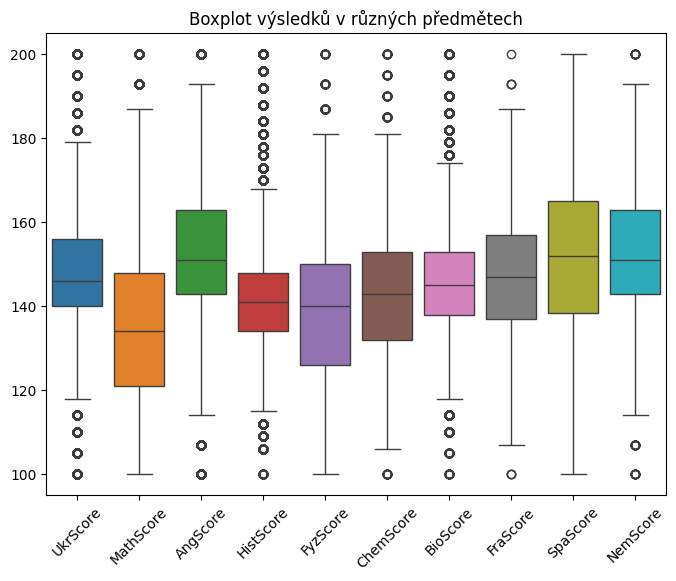

In [19]:
filtered_data = new_data[(new_data['UkrScore'] != 0) & 
                         (new_data['MathScore'] != 0) & 
                         (new_data['AngScore'] != 0) & 
                         (new_data['HistScore'] != 0) & 
                         (new_data['FyzScore'] != 0) & 
                         (new_data['ChemScore'] != 0) & 
                         (new_data['BioScore'] != 0) & 
                         (new_data['FraScore'] != 0) & 
                         (new_data['SpaScore'] != 0) & 
                         (new_data['NemScore'] != 0)]

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data[['UkrScore', 'MathScore', 'AngScore', 'HistScore', 'FyzScore', 'ChemScore', 'BioScore', 'FraScore', 'SpaScore', 'NemScore']])
plt.title('Boxplot výsledků v různých předmětech')
plt.xticks(rotation=45)
plt.show()

In [20]:
correlation_matrix = new_data[['UkrBody', 'MathScore', 'AngScore', 'HistScore', 'FyzScore', 'ChemScore', 'BioScore', 'FraScore','SpaScore', 'NemScore']].corr()

plt.figure(figsize=(12, 8))
print(correlation_matrix)

            UkrBody  MathScore  AngScore  HistScore  FyzScore  ChemScore  \
UkrBody    1.000000   0.528370  0.575459   0.632953  0.505332   0.675533   
MathScore  0.528370   1.000000  0.446944   0.410262  0.480770   0.592785   
AngScore   0.575459   0.446944  1.000000        NaN       NaN        NaN   
HistScore  0.632953   0.410262       NaN   1.000000       NaN        NaN   
FyzScore   0.505332   0.480770       NaN        NaN  1.000000        NaN   
ChemScore  0.675533   0.592785       NaN        NaN       NaN   1.000000   
BioScore   0.684068   0.468340       NaN        NaN       NaN        NaN   
FraScore   0.524335   0.485372       NaN        NaN       NaN        NaN   
SpaScore   0.367777   0.300387       NaN        NaN       NaN        NaN   
NemScore   0.525536   0.440784       NaN        NaN       NaN        NaN   

           BioScore  FraScore  SpaScore  NemScore  
UkrBody    0.684068  0.524335  0.367777  0.525536  
MathScore  0.468340  0.485372  0.300387  0.440784  
AngScor

<Figure size 1200x800 with 0 Axes>

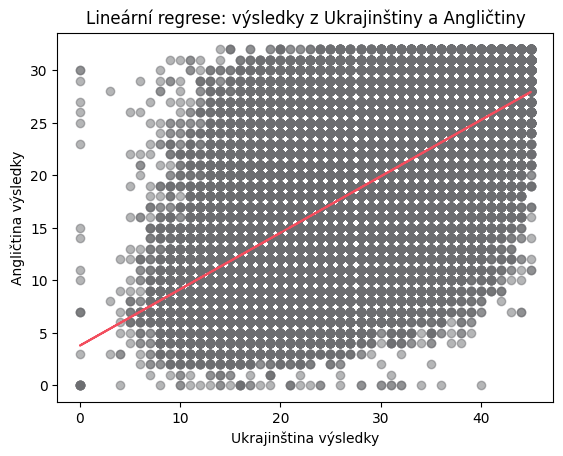

In [21]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
data = new_data[['UkrBody', 'AngBody']]
data = data.dropna()
X = data['UkrBody']  
y = data['AngBody']     

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

plt.scatter(data['UkrBody'], data['AngBody'], alpha=0.5, color='#6D6E71')
plt.plot(data['UkrBody'], model.predict(X), color='#F24E5E')

plt.title('Lineární regrese: výsledky z Ukrajinštiny a Angličtiny')
plt.xlabel('Ukrajinština výsledky')
plt.ylabel('Angličtina výsledky')

plt.show()

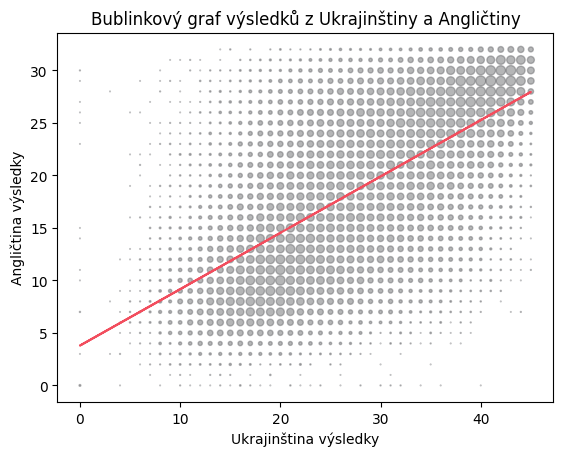

In [22]:
frequency = new_data.groupby(['UkrBody', 'AngBody']).size().reset_index(name='count')

plt.scatter(frequency['UkrBody'], frequency['AngBody'], s=frequency['count']*0.2, alpha=0.5, color='#6D6E71')
plt.plot(data['UkrBody'], model.predict(X), color='#F24E5E')

plt.title('Bublinkový graf výsledků z Ukrajinštiny a Angličtiny')
plt.xlabel('Ukrajinština výsledky')
plt.ylabel('Angličtina výsledky')

plt.show()

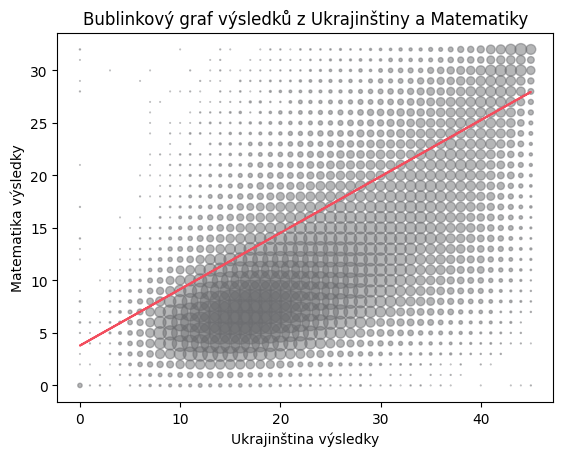

In [23]:
frequency = new_data.groupby(['UkrBody', 'MathBody']).size().reset_index(name='count')

plt.scatter(frequency['UkrBody'], frequency['MathBody'], s=frequency['count']*0.2, alpha=0.5, color='#6D6E71')
plt.plot(data['UkrBody'], model.predict(X), color='#F24E5E')

plt.title('Bublinkový graf výsledků z Ukrajinštiny a Matematiky')
plt.xlabel('Ukrajinština výsledky')
plt.ylabel('Matematika výsledky')

plt.show()

                            OLS Regression Results                            
Dep. Variable:               MathBody   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                 2.550e+05
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:41:11   Log-Likelihood:            -8.1414e+05
No. Observations:              268128   AIC:                         1.628e+06
Df Residuals:                  268126   BIC:                         1.628e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5189      0.027    -19.542      0.0

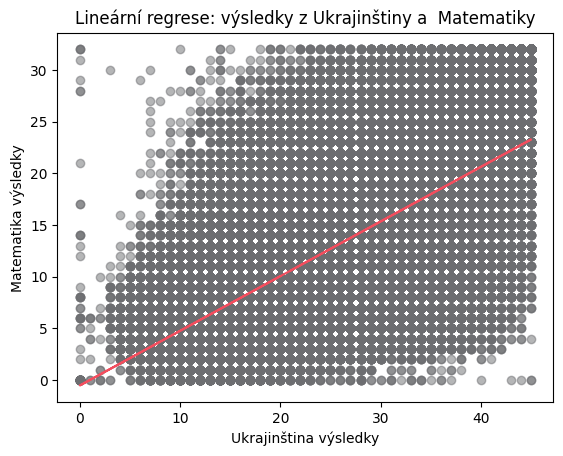

In [24]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
data = new_data[['UkrBody', 'MathBody']]
data = data.dropna()
X = data['UkrBody']  
y = data['MathBody']     

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(data['UkrBody'], data['MathBody'], alpha=0.5, color='#6D6E71')
plt.plot(data['UkrBody'], model.predict(X), color='#F24E5E')

plt.title('Lineární regrese: výsledky z Ukrajinštiny a  Matematiky')
plt.xlabel('Ukrajinština výsledky')
plt.ylabel('Matematika výsledky')

plt.show()

                            OLS Regression Results                            
Dep. Variable:               HistBody   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                 9.064e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:41:15   Log-Likelihood:            -4.8375e+05
No. Observations:              141068   AIC:                         9.675e+05
Df Residuals:                  141066   BIC:                         9.675e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9606      0.039    328.332      0.0

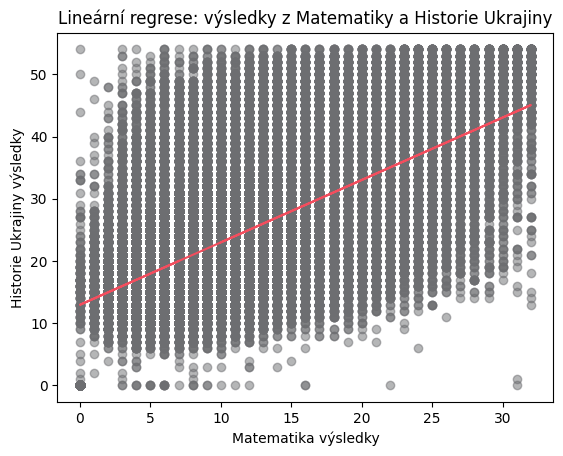

In [25]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
data = new_data[['MathBody', 'HistBody']]
data = data.dropna()
X = data['MathBody']  
y = data['HistBody']     

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(data['MathBody'], data['HistBody'], alpha=0.5, color='#6D6E71')
plt.plot(data['MathBody'], model.predict(X), color='#F24E5E')

plt.title('Lineární regrese: výsledky z Matematiky a Historie Ukrajiny')
plt.xlabel('Matematika výsledky')
plt.ylabel('Historie Ukrajiny výsledky')

plt.show()

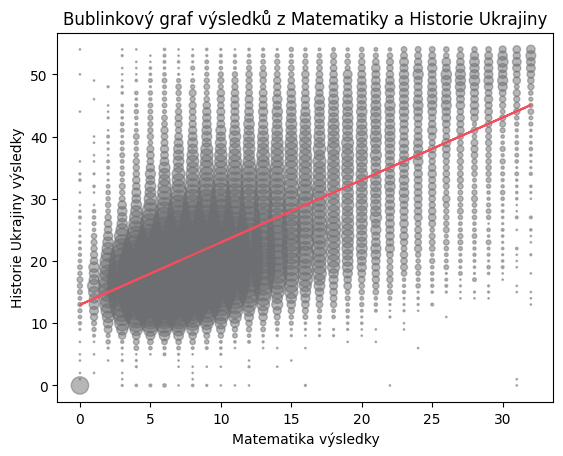

In [26]:
frekvence= new_data.groupby(['MathBody', 'HistBody']).size().reset_index(name='count')

plt.scatter(frekvence['MathBody'], frekvence['HistBody'], s=frekvence['count'], alpha=0.5, color='#6D6E71')
plt.plot(data['MathBody'], model.predict(X), color='#F24E5E')

plt.title('Bublinkový graf výsledků z Matematiky a Historie Ukrajiny')
plt.xlabel('Matematika výsledky')
plt.ylabel('Historie Ukrajiny výsledky')

plt.show()

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

new_data.groupby('StatusUcastnika').describe()

RokNarozeni                                          \
                             count         mean       std     min      25%   
StatusUcastnika                                                              
absolvent 2023            234570.0  2005.644869  0.806294  1969.0  2005.00   
absolvent minulých let     54331.0  2000.389446  6.745420  1953.0  2000.00   
vezenstvi                     34.0  1992.117647  7.554909  1978.0  1986.25   

                                                 UkrScore              \
                           50%      75%     max     count        mean   
StatusUcastnika                                                         
absolvent 2023          2006.0  2006.00  2009.0  224332.0  149.334192   
absolvent minulých let  2003.0  2004.00  2010.0   43764.0  143.490837   
vezenstvi               1991.0  1996.75  2005.0      32.0  135.531250   

                                                                      \
                              std    min    25%    50%    75%    max   
StatusUcastnika                                                        
absolvent 2023          17.470383    0.0  140.0  148.0  158.0  200.0   
absolvent minulých let  13.986789    0.0  136.0  144.0  150.0  200.0   
vezenstvi               14.457913  100.0  125.0  138.0  146.5  165.0   

                         UkrBody                                               \
                           count       mean       std  min   25%   50%    75%   
StatusUcastnika                                                                 
absolvent 2023          224332.0  24.154797  9.512814  0.0  17.0  23.0  32.00   
absolvent minulých let   43764.0  20.716799  7.456258  0.0  15.0  20.0  25.00   
vezenstvi                   32.0  16.781250  7.205439  5.0  11.0  16.0  22.25   

                             MathScore                                     \
                         max     count        mean        std  min    25%   
StatusUcastnika                                                             
absolvent 2023          45.0  224332.0  131.292125  33.275216  0.0  121.0   
absolvent minulých let  45.0   43764.0  121.248538  33.926647  0.0  114.0   
vezenstvi               35.0      32.0   91.312500  50.711987  0.0  100.0   

                                              MathBody                       \
                          50%     75%    max     count       mean       std   
StatusUcastnika                                                               
absolvent 2023          134.0  149.00  200.0  224332.0  12.438422  7.230562   
absolvent minulých let  126.0  140.00  200.0   43764.0   9.482269  5.320669   
vezenstvi               107.0  122.25  145.0      32.0   6.000000  3.141810   

                                                    AngScore              \
                        min  25%   50%    75%   max    count        mean   
StatusUcastnika                                                            
absolvent 2023          0.0  7.0  10.0  17.00  32.0  70717.0  152.104840   
absolvent minulých let  0.0  6.0   8.0  12.00  32.0   9529.0  148.324273   
vezenstvi               2.0  4.0   5.0   7.25  14.0      1.0  107.000000   

                                                                      AngBody  \
                              std    min    25%    50%    75%    max    count   
StatusUcastnika                                                                 
absolvent 2023          21.938765    0.0  143.0  151.0  163.0  200.0  70717.0   
absolvent minulých let  25.050189    0.0  137.0  149.0  159.0  200.0   9529.0   
vezenstvi                     NaN  107.0  107.0  107.0  107.0  107.0      1.0   

                                                                          \
                             mean       std  min   25%   50%   75%   max   
StatusUcastnika                                                            
absolvent 2023          18.923866  7.517542  0.0  13.0  19.0  25.0  32.0   
absolvent

In [28]:
filtered_data = new_data[new_data['StatusUcastnika'] == 'absolvent minulých let']
prumer_vysledky_predmety = filtered_data[['Pohlavi', 'UkrScore', 'MathScore', 'AngScore', 'HistScore', 'FyzScore', 'ChemScore', 'BioScore', 'FraScore', 'SpaScore', 'NemScore']].groupby('Pohlavi').mean()
prumer_vysledky_predmety

,UkrScore,MathScore,AngScore,HistScore,FyzScore,ChemScore,BioScore,FraScore,SpaScore,NemScore
Pohlavi,,,,,,,,,,
holka,146.499009,119.335976,150.431456,137.851016,112.215909,133.264331,144.462040,146.181818,154.533333,151.221519
kluk,141.033421,122.810935,147.092134,137.406794,125.739456,136.428571,142.085177,145.416667,129.800000,146.435897


In [29]:
pocet_vysledky_predmety = filtered_data[['Pohlavi', 'UkrScore', 'MathScore', 'AngScore', 'HistScore', 'FyzScore', 'ChemScore', 'BioScore', 'FraScore', 'SpaScore', 'NemScore']].groupby('Pohlavi').count()
pocet_vysledky_predmety

,UkrScore,MathScore,AngScore,HistScore,FyzScore,ChemScore,BioScore,FraScore,SpaScore,NemScore
Pohlavi,,,,,,,,,,
holka,19677,19677,3516,9887,88,314,5677,22,15,158
kluk,24087,24087,6013,13717,1067,161,3029,12,10,78


In [30]:
kluci = filtered_data[(filtered_data['Pohlavi'] == 'kluk') & (filtered_data['StatusUcastnika'] == 'absolvent minulých let')]
kluci_grouped = kluci.groupby('RokNarozeni').size().reset_index(name='count')

kluci_grouped

,RokNarozeni,count
0,1953,1
1,1957,1
2,1958,2
3,1959,1
4,1961,1
5,1963,1
6,1964,1
7,1965,3
8,1966,1
9,1967,7


In [31]:
pocet_absolventy_regiony = new_data[['RegionRegistrace', 'UkrScore', 'MathScore', 'AngScore', 'HistScore', 'FyzScore', 'ChemScore', 'BioScore', 
                                             'FraScore','SpaScore', 'NemScore']].groupby('RegionRegistrace').count()
pocet_absolventy_regiony

,UkrScore,MathScore,AngScore,HistScore,FyzScore,ChemScore,BioScore,FraScore,SpaScore,NemScore
RegionRegistrace,,,,,,,,,,
Cerkasky region,8379,8379,2135,4405,158,82,1572,4,0,23
Cernihivsky region,6792,6792,1530,4024,141,72,980,6,4,35
Cernivecky region,6456,6456,1489,3606,108,77,1104,31,1,40
Charkovsky region,15103,15103,5610,6790,332,194,1923,37,6,211
Chmelnicky region,10154,10154,2236,6273,176,158,1278,0,2,31
Dnepropetrovsky,21697,21697,6653,10678,527,288,3360,32,8,151
Donecky region,4819,4819,1449,2367,104,72,737,12,0,78
Ivano-Frankivsky region,11238,11238,2687,6780,207,201,1296,3,7,57
Kchersonsky region,2207,2207,794,940,60,20,357,1,6,29


In [32]:
prumer_vysledky_predmety_regiony = new_data[['RegionRegistrace', 'UkrScore', 'MathScore', 'AngScore', 'HistScore', 'FyzScore', 'ChemScore', 'BioScore', 
                                             'FraScore','SpaScore', 'NemScore']].groupby('RegionRegistrace').mean().round()
prumer_vysledky_predmety_regiony

,UkrScore,MathScore,AngScore,HistScore,FyzScore,ChemScore,BioScore,FraScore,SpaScore,NemScore
RegionRegistrace,,,,,,,,,,
Cerkasky region,147.0,127.0,150.0,141.0,124.0,149.0,144.0,156.0,NaN,142.0
Cernihivsky region,147.0,128.0,150.0,141.0,136.0,145.0,143.0,150.0,141.0,150.0
Cernivecky region,148.0,128.0,152.0,142.0,128.0,142.0,147.0,133.0,121.0,147.0
Charkovsky region,149.0,132.0,152.0,142.0,131.0,142.0,145.0,148.0,142.0,146.0
Chmelnicky region,147.0,128.0,151.0,141.0,138.0,141.0,146.0,NaN,154.0,156.0
Dnepropetrovsky,146.0,129.0,149.0,140.0,139.0,140.0,144.0,140.0,136.0,145.0
Donecky region,149.0,131.0,150.0,142.0,131.0,143.0,145.0,156.0,NaN,146.0
Ivano-Frankivsky region,148.0,126.0,151.0,141.0,136.0,135.0,147.0,138.0,149.0,150.0
Kchersonsky region,150.0,132.0,150.0,144.0,136.0,143.0,145.0,137.0,150.0,149.0


In [33]:
koeficienty = {'UkrScore': 0.3, 'MathScore': 0.2, 'AngScore': 0.3, 'HistScore': 0.5, 'FyzScore': 0.2, 'ChemScore': 0.2, 'BioScore': 0.2, 'FraScore': 0.3, 'SpaScore': 0.3, 'NemScore': 0.3}

vazena_new_data = new_data.multiply(pd.Series(koeficienty))
new_data['VazevyPocetBodu'] = vazena_new_data.sum(axis=1, skipna=True)

In [34]:
new_data_transformed = new_data.notna().astype(int)
new_data_transformed = new_data_transformed.multiply(pd.Series(koeficienty))
new_data['TotalKoeficienty'] = new_data_transformed.sum(axis=1, skipna=True)

In [35]:
new_data['PotrebneBody'] = new_data['VazevyPocetBodu'].div(new_data['TotalKoeficienty'].replace(0, pd.NA))

In [36]:
new_data

,RokNarozeni,Pohlavi,RegionRegistrace,ZkouskaVzahranici,StatusUcastnika,TestDate,Ukrajinstina,UkrVysledek,UkrScore,UkrBody,Matematika,MathVysledek,MathScore,MathBody,Anglictina,AngVysledek,AngScore,AngBody,HistorieUKR,HistVysledek,HistScore,HistBody,Fyzika,FyzVysledek,FyzScore,FyzBody,Chemie,ChemVysledek,ChemScore,ChemBody,Biologie,BioVysledek,BioScore,BioBody,Francouzstina,FraVysledek,FraScore,FraBody,Nemcina,NemVysledek,NemScore,NemBody,Spanelstina,SpaVysledek,SpaScore,SpaBody,VazevyPocetBodu,TotalKoeficienty,PotrebneBody
0,2006,holka,Zaporizsky region,False,absolvent 2023,13.06.2023,Ukrajinstina,uspech,145.0,21.0,Matematika,uspech,143.0,13.0,Anglictina,uspech,175.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.6,0.8,155.75
1,2006,holka,Kchersonsky region,True,absolvent 2023,19.06.2023,Ukrajinstina,uspech,153.0,28.0,Matematika,uspech,148.0,16.0,Anglictina,uspech,140.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.5,0.8,146.875
2,2006,holka,Dnepropetrovsky,False,absolvent 2023,08.06.2023,Ukrajinstina,uspech,195.0,44.0,Matematika,uspech,175.0,28.0,Anglictina,uspech,171.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.8,0.8,181.0
3,2003,holka,Zaporizsky region,False,absolvent minulých let,09.06.2023,Ukrajinstina,uspech,149.0,24.0,Matematika,uspech,121.0,7.0,NaN,NaN,NaN,NaN,HistorieUKR,uspech,140.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.9,1.0,138.9
4,2006,kluk,Kyjev město,False,absolvent 2023,12.06.2023,Ukrajinstina,uspech,140.0,17.0,Matematika,uspech,114.0,6.0,NaN,NaN,NaN,NaN,HistorieUKR,uspech,134.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.8,1.0,131.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288930,2006,kluk,Donecky region,False,absolvent 2023,07.06.2023,Ukrajinstina,uspech,174.0,38.0,Matematika,uspech,148.0,16.0,NaN,NaN,NaN,NaN,HistorieUKR,uspech,155.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.3,1.0,159.3
288931,2004,kluk,Volynsky region,False,absolvent minulých let,15.06.2023,Ukrajinstina,uspech,142.0,18.0,Matematika,uspech,131.0,9.0,NaN,NaN,NaN,NaN,HistorieUKR,uspech,130.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.8,1.0,133.8
288932,2006,holka,Lvivsky region,False,absolvent 2023,16.06.2023,Ukrajinstina,uspech,174.0,38.0,Matematika,uspech,187.0,30.0,Anglictina,uspech,171.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.9,0.8,176.125
288933,2004,kluk,Charkovsky region,False,absolvent 2023,08.06.2023,Ukrajinstina,uspech,128.0,12.0,Matematika,uspech,134.0,10.0,NaN,NaN,NaN,NaN,HistorieUKR,uspech,134.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.2,1.0,132.2


In [37]:
prumer_potrebne_body_regiony = new_data[['PotrebneBody']].groupby(new_data['RegionRegistrace']).mean()

prumer_potrebne_body_regiony

,PotrebneBody
RegionRegistrace,
Cerkasky region,141.269341
Cernihivsky region,141.253418
Cernivecky region,142.142643
Charkovsky region,143.720096
Chmelnicky region,141.607713
Dnepropetrovsky,140.946092
Donecky region,142.998477
Ivano-Frankivsky region,141.589709
Kchersonsky region,144.352011


In [38]:
filtered_data_neuspeli = new_data[new_data['PotrebneBody'] < 100]
filtered_data_100 = new_data[new_data['PotrebneBody'] >= 100]
filtered_data_130 = new_data[new_data['PotrebneBody'] >= 130]
filtered_data_140 = new_data[new_data['PotrebneBody'] >= 140]
filtered_data_150 = new_data[new_data['PotrebneBody'] >= 150]

pocet_neuspeli = filtered_data_neuspeli.groupby('RegionRegistrace').size().reset_index(name='PocetNeuspeli')
pocet_100 = filtered_data_100.groupby('RegionRegistrace').size().reset_index(name='PocetPotrebneBody100')
pocet_130 = filtered_data_130.groupby('RegionRegistrace').size().reset_index(name='PocetPotrebneBody130')
pocet_140 = filtered_data_140.groupby('RegionRegistrace').size().reset_index(name='PocetPotrebneBody140')
pocet_150 = filtered_data_150.groupby('RegionRegistrace').size().reset_index(name='PocetPotrebneBody150')

pocet_absolventy_regiony = pocet_neuspeli.merge(pocet_100, on='RegionRegistrace', how='left') \
                                         .merge(pocet_130, on='RegionRegistrace', how='left') \
                                         .merge(pocet_140, on='RegionRegistrace', how='left') \
                                         .merge(pocet_150, on='RegionRegistrace', how='left')

pocet_absolventy_regiony['PocetAbsolventu'] = pocet_absolventy_regiony[['PocetNeuspeli', 'PocetPotrebneBody100', 'PocetPotrebneBody130', 'PocetPotrebneBody140', 'PocetPotrebneBody150']].sum(axis=1)

pocet_absolventy_regiony['PodilNeuspeli'] = ((pocet_absolventy_regiony['PocetNeuspeli'] / pocet_absolventy_regiony['PocetAbsolventu']) * 100).round(1)
pocet_absolventy_regiony['PodilPotrebneBody100'] = ((pocet_absolventy_regiony['PocetPotrebneBody100'] / pocet_absolventy_regiony['PocetAbsolventu']) * 100).round(1)
pocet_absolventy_regiony['PodilPotrebneBody130'] = ((pocet_absolventy_regiony['PocetPotrebneBody130'] / pocet_absolventy_regiony['PocetAbsolventu']) * 100).round(1)
pocet_absolventy_regiony['PodilPotrebneBody140'] = ((pocet_absolventy_regiony['PocetPotrebneBody140'] / pocet_absolventy_regiony['PocetAbsolventu']) * 100).round(1)
pocet_absolventy_regiony['PodilPotrebneBody150'] = ((pocet_absolventy_regiony['PocetPotrebneBody150'] / pocet_absolventy_regiony['PocetAbsolventu']) * 100).round(1)


pocet_absolventy_regiony['PodilNeuspeli'] = pocet_absolventy_regiony['PodilNeuspeli'].astype(str) + '%'
pocet_absolventy_regiony['PodilPotrebneBody100'] = pocet_absolventy_regiony['PodilPotrebneBody100'].astype(str) + '%'
pocet_absolventy_regiony['PodilPotrebneBody130'] = pocet_absolventy_regiony['PodilPotrebneBody130'].astype(str) + '%'
pocet_absolventy_regiony['PodilPotrebneBody140'] = pocet_absolventy_regiony['PodilPotrebneBody140'].astype(str) + '%'
pocet_absolventy_regiony['PodilPotrebneBody150'] = pocet_absolventy_regiony['PodilPotrebneBody150'].astype(str) + '%'

pocet_absolventy_regiony = pocet_absolventy_regiony[['RegionRegistrace', 'PocetAbsolventu', 'PocetNeuspeli', 'PodilNeuspeli', 
                                                     'PocetPotrebneBody100', 'PodilPotrebneBody100', 'PocetPotrebneBody130', 
                                                     'PodilPotrebneBody130', 'PocetPotrebneBody140', 'PodilPotrebneBody140', 
                                                     'PocetPotrebneBody150', 'PodilPotrebneBody150']]

pocet_absolventy_regiony

,RegionRegistrace,PocetAbsolventu,PocetNeuspeli,PodilNeuspeli,PocetPotrebneBody100,PodilPotrebneBody100,PocetPotrebneBody130,PodilPotrebneBody130,PocetPotrebneBody140,PodilPotrebneBody140,PocetPotrebneBody150,PodilPotrebneBody150
0,Cerkasky region,21510,138,0.6%,8241,38.3%,6688,31.1%,4275,19.9%,2168,10.1%
1,Cernihivsky region,17439,111,0.6%,6681,38.3%,5448,31.2%,3440,19.7%,1759,10.1%
2,Cernivecky region,16877,110,0.7%,6346,37.6%,5176,30.7%,3388,20.1%,1857,11.0%
3,Charkovsky region,41189,240,0.6%,14863,36.1%,12579,30.5%,8720,21.2%,4787,11.6%
4,Chmelnicky region,26277,150,0.6%,10004,38.1%,8154,31.0%,5228,19.9%,2741,10.4%
5,Dnepropetrovsky,55289,410,0.7%,21287,38.5%,17259,31.2%,10930,19.8%,5403,9.8%
6,Donecky region,12983,95,0.7%,4724,36.4%,3985,30.7%,2715,20.9%,1464,11.3%
7,Ivano-Frankivsky region,28861,218,0.8%,11020,38.2%,8890,30.8%,5695,19.7%,3038,10.5%
8,Kchersonsky region,6121,36,0.6%,2171,35.5%,1880,30.7%,1311,21.4%,723,11.8%
9,Kirovohradsky region,15722,115,0.7%,6201,39.4%,4947,31.5%,3017,19.2%,1442,9.2%


In [39]:
pocet_absolventy_regiony.to_csv('pocet_absolventu_regiony_potrebne_body.csv')

In [40]:
new_data.describe(include='all')


,RokNarozeni,Pohlavi,RegionRegistrace,ZkouskaVzahranici,StatusUcastnika,TestDate,Ukrajinstina,UkrVysledek,UkrScore,UkrBody,Matematika,MathVysledek,MathScore,MathBody,Anglictina,AngVysledek,AngScore,AngBody,HistorieUKR,HistVysledek,HistScore,HistBody,Fyzika,FyzVysledek,FyzScore,FyzBody,Chemie,ChemVysledek,ChemScore,ChemBody,Biologie,BioVysledek,BioScore,BioBody,Francouzstina,FraVysledek,FraScore,FraBody,Nemcina,NemVysledek,NemScore,NemBody,Spanelstina,SpaVysledek,SpaScore,SpaBody,VazevyPocetBodu,TotalKoeficienty,PotrebneBody
count,288935.000000,288935,288935,288935,288935,288935,288935,288935,268128.000000,268128.000000,288935,288935,268128.000000,268128.000000,85552,85552,80247.000000,80247.000000,151839,151839,141068.000000,141068.000000,5830,5830,5254.000000,5254.000000,3448,3448,3218.000000,3218.000000,39501,39501,36009.000000,36009.000000,311,311,273.000000,273.000000,2278,2278,1913.000000,1913.000000,176,176,146.000000,146.000000,288935.0,288935.000000,268128.0
unique,NaN,2,26,2,3,12,1,4,NaN,NaN,1,4,NaN,NaN,1,4,NaN,NaN,1,4,NaN,NaN,1,4,NaN,NaN,1,4,NaN,NaN,1,4,NaN,NaN,1,3,NaN,NaN,1,3,NaN,NaN,1,2,NaN,NaN,2393.0,NaN,3786.0
top,NaN,holka,Kyjev město,False,absolvent 2023,14.06.2023,Ukrajinstina,uspech,NaN,NaN,Matematika,uspech,NaN,NaN,Anglictina,uspech,NaN,NaN,HistorieUKR,uspech,NaN,NaN,Fyzika,uspech,NaN,NaN,Chemie,uspech,NaN,NaN,Biologie,uspech,NaN,NaN,Francouzstina,uspech,NaN,NaN,Nemcina,uspech,NaN,NaN,Spanelstina,uspech,NaN,NaN,0.0,NaN,140.0
freq,NaN,148941,30568,262241,234570,29164,288935,267871,NaN,NaN,288935,256741,NaN,NaN,85552,79814,NaN,NaN,151839,140844,NaN,NaN,5830,5036,NaN,NaN,3448,3206,NaN,NaN,39501,35944,NaN,NaN,311,272,NaN,NaN,2278,1889,NaN,NaN,176,146,NaN,NaN,20820.0,NaN,1082.0
mean,2004.655054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.378789,23.592765,NaN,NaN,129.648034,11.955148,NaN,NaN,151.655352,18.755692,NaN,NaN,141.496612,23.228578,NaN,NaN,132.443472,12.887895,NaN,NaN,142.911436,18.156930,NaN,NaN,145.590102,21.948791,NaN,NaN,146.703297,16.600733,NaN,NaN,149.847360,18.396236,NaN,NaN,149.363014,18.000000,NaN,0.824642,NaN
std,3.650400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.087948,9.295827,NaN,NaN,33.593135,7.039952,NaN,NaN,22.364644,7.580948,NaN,NaN,15.025422,9.567606,NaN,NaN,33.774317,7.218582,NaN,NaN,21.213128,9.389836,NaN,NaN,16.111302,8.849013,NaN,NaN,20.427325,7.344836,NaN,NaN,24.900759,7.398534,NaN,NaN,22.758062,8.256241,NaN,0.257973,NaN
min,1953.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,100.000000,4.000000,NaN,0.000000,NaN
25%,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.000000,16.000000,NaN,NaN,121.000000,7.000000,NaN,NaN,140.000000,12.000000,NaN,NaN,134.000000,17.000000,NaN,NaN,121.000000,7.000000,NaN,NaN,129.000000,10.000000,NaN,NaN,136.000000,15.000000,NaN,NaN,137.000000,11.000000,NaN,NaN,143.000000,13.000000,NaN,NaN,134.750000,10.250000,NaN,0.800000,NaN
50%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.000000,22.000000,NaN,NaN,134.000000,10.000000,NaN,NaN,151.000000,19.000000,NaN,NaN,141.000000,21.000000,NaN,NaN,137.000000,11.000000,NaN,NaN,143.000000,16.000000,NaN,NaN,145.000000,20.000000,NaN,NaN,147.000000,15.000000,NaN,NaN,151.000000,19.000000,NaN,NaN,150.500000,18.500000,NaN,0.800000,NaN
75%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.000000,30.000000,NaN,NaN,148.000000,16.000000,NaN,NaN,163.000000,25.000000,NaN,NaN,147.000000,27.000000,NaN,NaN,149.000000,17.000000,NaN,NaN,153.000000,25.000000,NaN,NaN,152.000000,27.000000,NaN,NaN,157.000000,23.000000,NaN,NaN,163.000000,25.000000,NaN,NaN,163.000000,25.000000,NaN,1.000000,NaN


In [41]:
new_data.to_csv('maturity_UKR_2023.csv')